**Tech Giants Salary Analysis**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
import sys

Data from here: https://docs.google.com/forms/d/1K5UlbdsX3uv8EtDzNkNu8EUgFOu3RQQqWg3L9TuSep0/viewform

In [3]:
# only keep employers whith at least 10 employees in this dataset
# this for whatever reason doesn't work with the lambda (example in the documentation)
def more_than_10(group):
    return len(group) > 10


def clean_numeric(row):
    try:
        if float(row) <= 0.0:
            return None
        else:
            return float(row)
    except:
        return None
    
def consistify_strings(df):
    df.loc[df['Employer'] == 'Amazon.com', :] = 'Amazon'
    return df



In [40]:
df = (pd.read_csv('salaries.csv', usecols=['Employer', 'Annual Base Pay', 'Years at Employer', 'Years of Experience', 'Gender'])
      .rename(columns=lambda x:x.replace(' ', '_'))
      .pipe(consistify_strings)
      .assign(Anual_Base_Pay = lambda x:x['Annual_Base_Pay'].apply(clean_numeric).apply(lambda x: x if x < 300000 else None),
              Years_of_Experience = lambda x:x['Years_of_Experience'].apply(clean_numeric),
              Years_at_Employer = lambda x:x['Years_at_Employer'].apply(clean_numeric))
      .dropna()
      .groupby('Employer').filter(more_than_10)
      .assign(Years_of_Experience_Bins = lambda x:x['Years_of_Experience'].astype(int),
              Years_at_Employer_Bins = lambda x:x['Years_at_Employer'].astype(int),
              Annual_Base_Pay = lambda x:x['Annual_Base_Pay'].astype(int))
    )


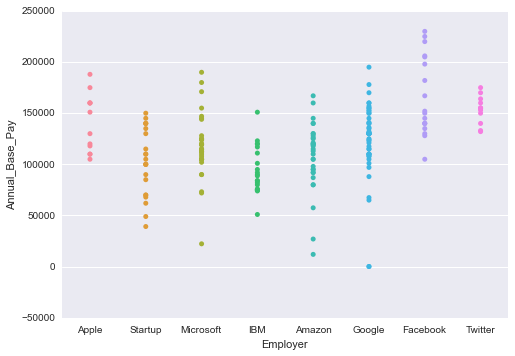

In [41]:
sns.stripplot('Employer', 'Annual_Base_Pay', data=df)

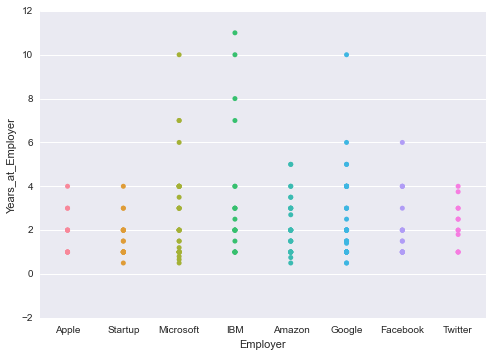

In [42]:
sns.stripplot('Employer', 'Years_at_Employer', data=df)

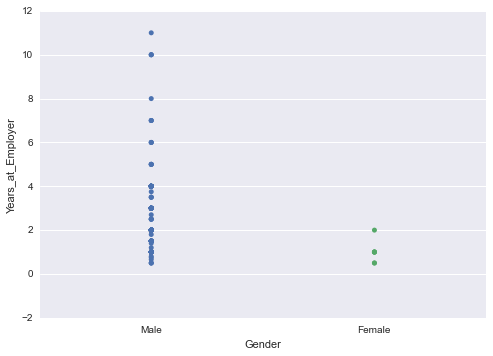

In [43]:
sns.stripplot('Gender', 'Years_at_Employer', data=df)

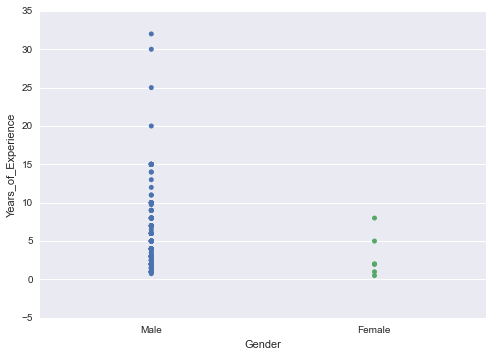

In [44]:
sns.stripplot('Gender', 'Years_of_Experience', data=df)

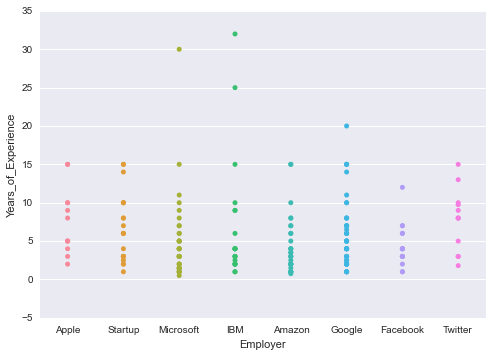

In [45]:
sns.stripplot('Employer', 'Years_of_Experience', data=df)

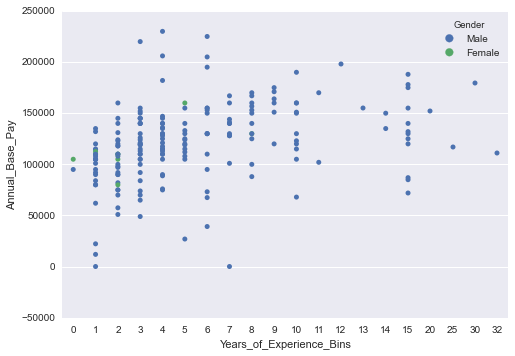

In [46]:
sns.stripplot('Years_of_Experience_Bins', 'Annual_Base_Pay', hue='Gender', data=df)

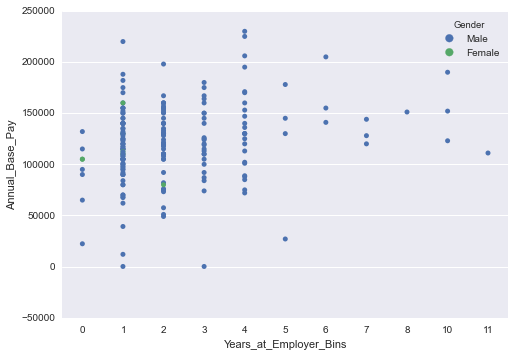

In [47]:
sns.stripplot('Years_at_Employer_Bins', 'Annual_Base_Pay', hue='Gender', data=df)

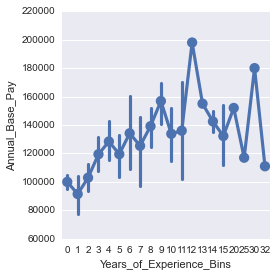

In [48]:
sns.factorplot('Years_of_Experience_Bins', 'Annual_Base_Pay', data=df, kind='point')

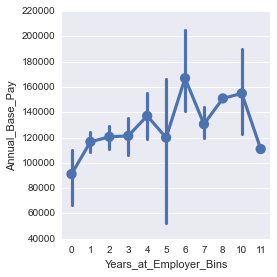

In [49]:
sns.factorplot('Years_at_Employer_Bins', 'Annual_Base_Pay', data=df)